In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

In [2]:
# Load the full dataset
from src.data.preprocess import build_dataset

df = build_dataset(raw_dir="../data/raw")
df.dropna(inplace=True)
print(f"Dataset shape: {df.shape}")
df.head()

Looking for users in: ../data/raw

Processing user_5...
Features shape for user_5: (1475, 8)
✅ Added features for user_5

Processing user_2...
Features shape for user_2: (1423, 8)
✅ Added features for user_2

Processing user_3...
Features shape for user_3: (1485, 8)
✅ Added features for user_3

Processing user_4...
Features shape for user_4: (1470, 8)
✅ Added features for user_4

Processing user_22...
Features shape for user_22: (1407, 8)
✅ Added features for user_22

Processing user_14...
Features shape for user_14: (1421, 8)
✅ Added features for user_14

Processing user_13...
Features shape for user_13: (1404, 8)
✅ Added features for user_13

Processing user_12...
Features shape for user_12: (1432, 8)
✅ Added features for user_12

Processing user_15...
Features shape for user_15: (1530, 8)
✅ Added features for user_15

Processing user_1...
Features shape for user_1: (1416, 8)
✅ Added features for user_1

Processing user_6...
Features shape for user_6: (1430, 8)
✅ Added features for u

,timestamp,hr_mean,hr_std,vector magnitude_mean,vector magnitude_std,steps_sum,user_id,is_sleeping
0,2023-01-01 09:25:00,123.200000,55.741068,88.393000,35.162447,6,user_5,False
4,2023-01-01 09:29:00,92.867925,5.955081,196.684151,154.403564,27,user_5,False
5,2023-01-01 09:30:00,91.410256,2.807115,108.141795,79.964720,16,user_5,False
6,2023-01-01 09:31:00,79.270833,11.254767,11.975417,36.625821,2,user_5,False
7,2023-01-01 09:32:00,71.541667,2.133405,45.270000,75.995720,7,user_5,False


In [3]:
# Prepare features and labels
X = df.drop(columns=["timestamp", "user_id", "is_sleeping"])
y = df["is_sleeping"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (23480, 5)
Test set shape: (5870, 5)


In [4]:
# Train and evaluate models
from src.models.evaluate_models import train_and_evaluate_models

results = train_and_evaluate_models(X_train, X_test, y_train, y_test)
results

/Users/noecrn/Documents/mmash-sleep-detector/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [11:56:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-score
0,RandomForest,0.882794,0.670551,0.626733,0.647902
1,LogReg,0.863032,0.613187,0.552475,0.581250
2,SVM,0.871721,0.623202,0.643564,0.633220
3,XGBoost,0.886371,0.687023,0.623762,0.653866


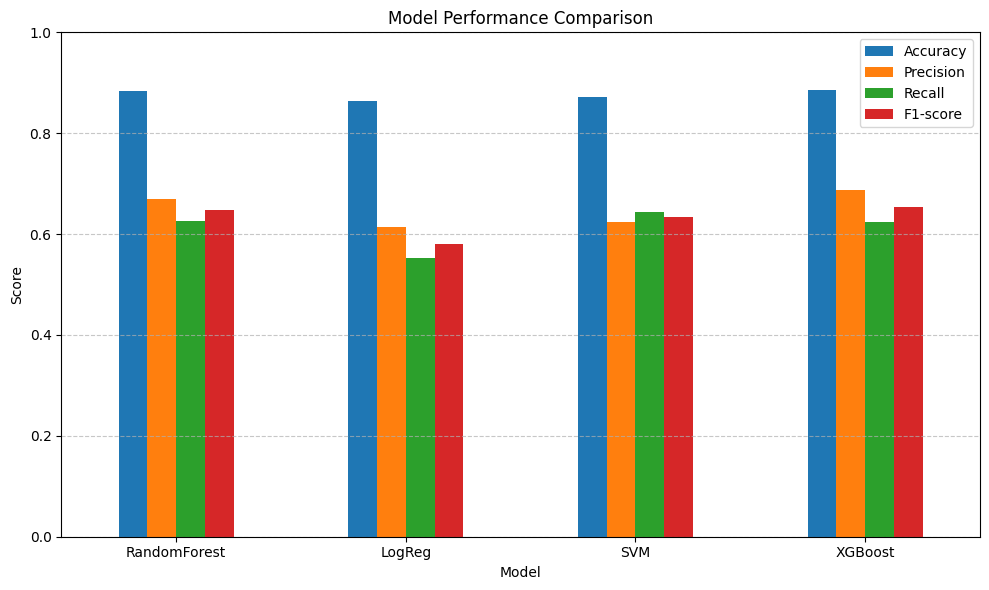

In [5]:
# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
results.set_index("Model").plot(kind="bar", ax=ax)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot BEFORE showing
plt.savefig("../reports/model_comparison.png")
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

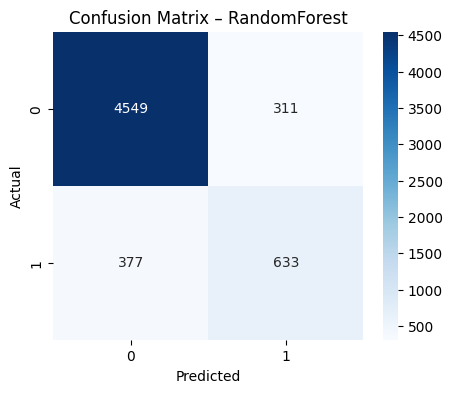

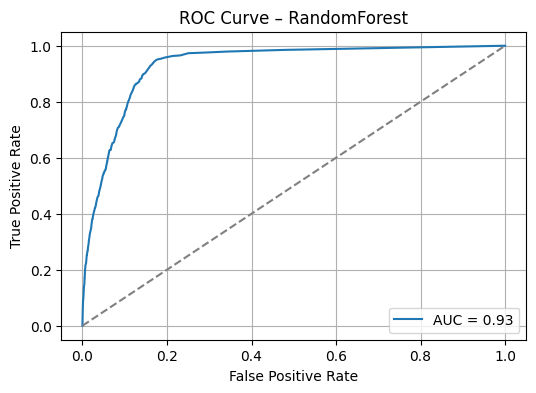

<Figure size 640x480 with 0 Axes>

In [7]:
from src.visualization.plot import plot_confusion_matrix, plot_roc_curve

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix – RandomForest")
plot_roc_curve(y_test, y_proba, title="ROC Curve – RandomForest")

# Save the plots
plt.savefig("../reports/confusion_matrix_random_forest.png")
plt.savefig("../reports/roc_curve_random_forest.png")

In [8]:
import joblib

# Sauvegarde du modèle RandomForest
joblib.dump(model, "../models/random_forest_model.joblib")
print("✅ Modèle RandomForest sauvegardé.")

✅ Modèle RandomForest sauvegardé.
